In [1]:
# Import Dependencies
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from config import gkey

In [2]:
# Set File path for original Data Set
shark_attack_csv = 'data_files/attacks.csv'

In [3]:
# Read CSV into a Data Frame
shark_df = pd.read_csv(shark_attack_csv, encoding='iso-8859-1')

In [4]:
shark_df.shape

(6302, 24)

In [5]:
#View Sample
shark_df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-18,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303,NaN,NaN
1,2018.06.18,18-Jun-18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302,NaN,NaN
2,2018.06.09,9-Jun-18,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301,NaN,NaN
3,2018.06.08,8-Jun-18,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300,NaN,NaN
4,2018.06.04,4-Jun-18,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299,NaN,NaN


In [6]:
# Removes two unneccessary columns
del shark_df['Unnamed: 22']
del shark_df['Unnamed: 23']
del shark_df['Case Number']
del shark_df['Investigator or Source']
del shark_df['href formula']
del shark_df['href']
del shark_df['Case Number.1']
del shark_df['Case Number.2']
del shark_df['original order']
del shark_df['pdf']
del shark_df['Name']

In [7]:
# Update columns that have extra spaces
shark_df = shark_df.rename(columns={"Sex ": "Sex", "Species ": "Species"})

In [8]:
# Update blank cells in columns to "Unknown" instead of dropping those rows
shark_df['Species'] = shark_df['Species'].replace({np.nan: 'Non-Disclosed'})
shark_df["Sex"] = shark_df["Sex"].replace({np.nan: "Non-Disclosed"})

In [9]:
# Standard values in column "Fatal (Y/N)"
shark_df["Fatal (Y/N)"] = shark_df["Fatal (Y/N)"].replace({np.nan: "Uncomfirmed", "UNKNOWN": "Uncomfirmed", " N": "N", 
                                                           "2017": "Uncomfirmed", "M": "Uncomfirmed", "N ": "N", "y": "Y"})

# Activity 

In [10]:
shark_df.head()

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,25-Jun-18,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,14h00 -15h00,Non-Disclosed
2,9-Jun-18,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,Non-Disclosed
3,8-Jun-18,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,4-Jun-18,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"


In [11]:
# Need to standardize list of activities to fix spelling errors and group similar activities
activities = shark_df["Activity"].unique()
for activity in activities:
    print(activity)

Paddling
Standing
Surfing
Free diving
Kite surfing
Swimming
Fishing
Walking
Feeding sharks
Boogie boarding
Scuba diving
Paddle-skiing
Body boarding
Windsurfing
Stand-Up Paddleboarding
Wading
Scuba Diving
Kayak fishing for sharks
Cleaning fish
Snorkeling
Spearfishing
nan
Diving
Fishing / Wading
2 boats capsized
Night bathing
Surfing 
Kayaking / Fishing
Kayaking
Body surfing
Swimming, poaching abalone
Canoeing
SUP
Skimboarding
Touching a shark
Fishing 
Attempting to lasso a shark
Photo shoot
Paddle boarding
Kakaying
Washing hands
Grabbing shark for a selfie
Kayak fishing
Tagging sharks
Surf skiing 
Surf fishing
Floating
Cage Diving
Surfng
SUP Foil boarding
Lobstering
Fishing in Alabama Deep Fishing Rodeo
Fishing for squid
Fishing for sharks
Floating in tube
Teasing a shark
Surf-skiing
Diving for beche-de-mer
Feeding stingrays?
Kayak Fishing
Sea disaster
Lobster fishing
Swimming / Wading
Fishing for shrimp
Photographing fish
Scallop diving on hookah
Treading water
Body boarding 
Playing i

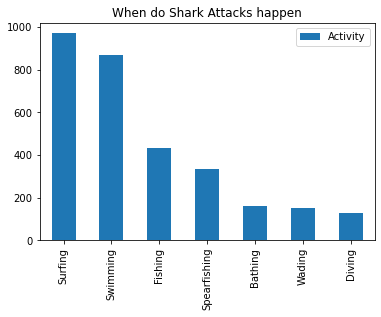

In [12]:
shark_activity=shark_df["Activity"].value_counts().to_frame()
activity_df=shark_activity[shark_activity['Activity']>100]
activity_df.plot(kind="bar",title="When do Shark Attacks happen")
plt.show()

# Species 


In [13]:
# Need to standardize list of species to remove sizes and non-species to 'Non-Disclosed'
sharks = shark_df["Species"].unique()
for shark in sharks:
    print(shark)

White shark
Non-Disclosed
2 m shark
Tiger shark, 3m
Tiger shark
Lemon shark, 3'
Bull shark, 6'
Grey reef shark
Invalid incident
Tawny nurse shark, 2m
Shark involvement not confirmed
Questionable
3 m shark
White shark, 3.5 m
White shark, 2.5 m
6' shark
Juvenile bull shark
Bull shark
Tiger shark, 12'
Wobbegong shark
3.5 m shark
1.8 m shark
Blacktip shark
Juvenile white shark,  2.7 to 3.2 m
Bull shark, 2 m
Possibly a wobbegong
Injury believed caused by an eel, not a shark
Galapagos shark?
2m shark
Bull shark, 3 m 
Grey reef shark. 2 m
small shark
Wobbegong shark?
Juvenile nurse shark
Nurse shark. 5'
Tiger shark, female
Some drowned but other may have been killed by blue sharks
White shark, 4.6 m
Cookiecutter shark
Wobbegong shark, 1 m
White shark, 4.5 m
Spinner shark, 4 to 5 feet
Tiger shark, 8 to 10 feet
8' shark
Death may have been due to drowning
5' shark
4' to 5' shark
Porbeagle, 1.5 m
White shark, 3.5m
5' to 6' shark
White shark, 3 to 3.5m 
Nurse shark
White shark, 3 m
Shark involvem

In [14]:
shark_df['Species'].value_counts()

Non-Disclosed                                                      2838
White shark                                                         163
Shark involvement prior to death was not confirmed                  105
Invalid                                                             102
Shark involvement not confirmed                                      88
                                                                   ... 
Carpet shark, 10'                                                     1
Tiger shark caught 6 days later with divers remains in its gut       1
Thought to involve a 12' white shark                                  1
Bull shark, 8                                                         1
Said to involve a tiger shark or a hammerhead shark                   1
Name: Species, Length: 1550, dtype: int64

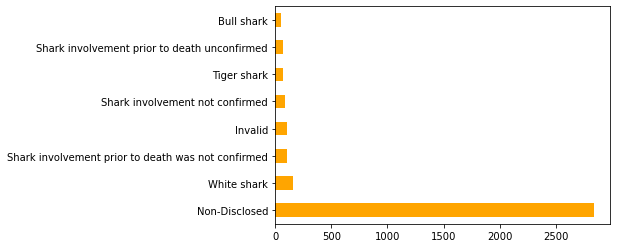

In [15]:
species_df = shark_df['Species'].value_counts()
species_df[species_df>50].plot.barh(color='orange')
plt.show()

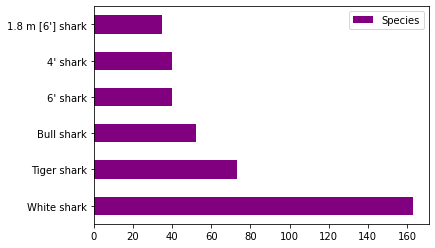

In [16]:
species_df = shark_df['Species'].value_counts().to_frame()
species_df=species_df.drop(['Non-Disclosed', 'Shark involvement prior to death was not confirmed','Invalid',
                            'Shark involvement not confirmed','Shark involvement prior to death unconfirmed',
                            'Questionable incident'])
species_df[species_df['Species']>34].plot.barh(color='purple')
plt.show()

# Date 

In [17]:
shark_df['Species'].value_counts() 

Non-Disclosed                                                      2838
White shark                                                         163
Shark involvement prior to death was not confirmed                  105
Invalid                                                             102
Shark involvement not confirmed                                      88
                                                                   ... 
Carpet shark, 10'                                                     1
Tiger shark caught 6 days later with divers remains in its gut       1
Thought to involve a 12' white shark                                  1
Bull shark, 8                                                         1
Said to involve a tiger shark or a hammerhead shark                   1
Name: Species, Length: 1550, dtype: int64

In [18]:
shark_df["Date"] = shark_df["Date"].replace({"06-26-1890": "26-Jun-1890"})
shark_df["Date"] = shark_df["Date"].replace({"2017.06.05": "05-Jun-2017"})
shark_df["Date"] = shark_df["Date"].replace({"1950.07.19": "19-Jul-1950"})
shark_df["Date"] = shark_df["Date"].replace({"09-Jul-2006.": "09-Jul-2006"})
shark_df["Date"] = shark_df["Date"].replace({"2008.01.30": "30-Jan-2008"})
shark_df["Date"] = shark_df["Date"].replace({"19-Jul-2007.b": "19-Jul-2007"})
shark_df["Date"] = shark_df["Date"].replace({"19-Jul-2007.a": "19-Jul-2007"})
shark_df["Date"] = shark_df["Date"].replace({"26-Jul-1975.b": "26-Jul-1975"})
shark_df["Date"] = shark_df["Date"].replace({"1844.07.16.R": "16-Jul-1844"})
shark_df["Date"] = shark_df["Date"].replace({"1836.07.26.R": "26-Jul-1836"})
shark_df["Date"] = shark_df["Date"].replace({"1898.01.24": "24-Jan-1898"})
shark_df["Date"] = shark_df["Date"].replace({"1951.12.15.R": "15-Dec-1951"})

In [19]:
#extract data only with the format day-month-year
shark_df['Cleaned_Date_1']=shark_df['Date'].str.extract(r'(\d+-[\w]+-\d+)')
#extract date only with the format month-year
shark_df['Cleaned_Date_2']=shark_df['Date'].str.extract(r'(^[A-Za-z]+-\d+)')
#extract date with the format day-month
shark_df['Cleaned_Date_3']=shark_df['Date'].str.extract(r'(^[\d]+-[A-Za-z]+$)')

#extract day
shark_df['Day_1']=shark_df['Cleaned_Date_1'].str.extract(r'(\d+)')
shark_df['Day_2']=shark_df['Cleaned_Date_3'].str.extract(r'(\d+)')
shark_df['Day_1']=shark_df['Day_1'].fillna('')
shark_df['Day_2']=shark_df['Day_2'].fillna('')
shark_df['Day']=shark_df['Day_1'].astype(str)+shark_df['Day_2'].astype(str)

#extract month
shark_df['Month_1']=shark_df['Cleaned_Date_1'].str.extract(r'(-\w+-)')
shark_df['Month_1']=shark_df['Month_1'].str.replace('-','')

shark_df['Month_2']=shark_df['Cleaned_Date_2'].str.extract(r'(\w+)')

shark_df['Month_3']=shark_df['Cleaned_Date_3'].str.extract(r'(-\w+)')
shark_df['Month_3']=shark_df['Month_3'].str.replace('-','')

shark_df['Month_1']=shark_df['Month_1'].fillna('')
shark_df['Month_2']=shark_df['Month_2'].fillna('')
shark_df['Month_3']=shark_df['Month_3'].fillna('')

shark_df['Month']=shark_df['Month_1'].astype(str)+shark_df['Month_2'].astype(str)+shark_df['Month_3'].astype(str)

In [20]:
del shark_df['Cleaned_Date_1']
del shark_df['Cleaned_Date_2']
del shark_df['Cleaned_Date_3']
del shark_df['Day_1']
del shark_df['Day_2']
del shark_df['Month_1']
del shark_df['Month_2']
del shark_df['Month_3']

In [21]:
shark_df['Month']=shark_df['Month'].replace('', np.nan)
shark_df['Day']=shark_df['Day'].replace('', np.nan)

In [22]:
shark_df = shark_df[shark_df['Month'].notna()]

In [23]:
shark_df = shark_df[shark_df['Day'].notna()]

In [24]:
shark_df=shark_df.reset_index(drop=True)

In [25]:
shark_df

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Day,Month
0,25-Jun-18,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,25,Jun
1,18-Jun-18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,14h00 -15h00,Non-Disclosed,18,Jun
2,9-Jun-18,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,Non-Disclosed,9,Jun
3,8-Jun-18,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,8,Jun
4,4-Jun-18,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",4,Jun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5465,"No date, Before 8-May-1965",0.0,Unprovoked,GREECE,Island of Volos,Eastern shore,Swimming,F,NaN,FATAL,Y,NaN,Non-Disclosed,8,May
5466,Before 19-Jun-1959,0.0,Unprovoked,USA,California,"Capistrano, Orange County",NaN,F,NaN,Leg injured,N,NaN,"White shark, 1,900-lb",19,Jun
5467,Before 17-Jul-1916,0.0,Unprovoked,USA,North Carolina,Somewhere between Hatteras and Beaufort,Swimming,M,NaN,"""Lost leg""",N,NaN,Non-Disclosed,17,Jul
5468,No date (3 days after preceding incident) & pr...,0.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Fishing,M,NaN,"FATAL, body not recovered but shark was caught...",Y,NaN,Non-Disclosed,19,Jul


## Year

In [26]:
shark_df['Year'] = shark_df['Year'].fillna(0)
shark_df['Year'] = shark_df['Year'].astype(int)
#extract the rows which the year is greater than 0
shark_df=shark_df[shark_df['Year']>1959]

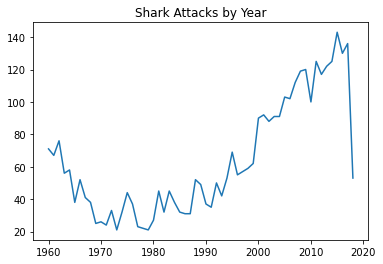

In [27]:
Years_values = shark_df['Year'].value_counts().sort_index()
Years_values.plot(title="Shark Attacks by Year")
plt.show()

## Month

In [28]:
shark_df["Month"] = shark_df["Month"].replace({"Sept": "Sep"})
shark_df["Month"] = shark_df["Month"].replace({"March": "Mar"})
shark_df["Month"] = shark_df["Month"].replace({"Ap": "Apr"})

<ipython-input-28-44504f499a02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_df["Month"] = shark_df["Month"].replace({"Sept": "Sep"})
<ipython-input-28-44504f499a02>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_df["Month"] = shark_df["Month"].replace({"March": "Mar"})
<ipython-input-28-44504f499a02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [29]:
shark_df.Month.value_counts()

Jul    414
Aug    391
Sep    389
Jun    350
Jan    318
Apr    313
Oct    312
May    264
Mar    263
Dec    261
Nov    247
Feb    243
Name: Month, dtype: int64

In [30]:
shark_df["Month"] = shark_df["Month"].replace({"Ap": "Apr"})
shark_df["Month"] = shark_df["Month"].replace({"Sept": "Sep"})
shark_df["Month"] = shark_df["Month"].replace({"March": "Mar"})

<ipython-input-30-3d0f3e0ee147>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_df["Month"] = shark_df["Month"].replace({"Ap": "Apr"})
<ipython-input-30-3d0f3e0ee147>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_df["Month"] = shark_df["Month"].replace({"Sept": "Sep"})
<ipython-input-30-3d0f3e0ee147>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

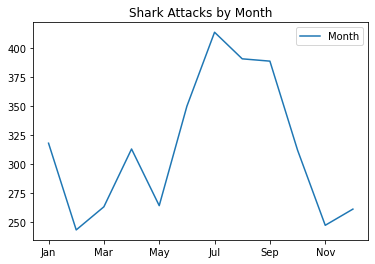

In [31]:
month_shark_df=shark_df['Month'].value_counts().to_frame().transpose()
month_shark_df = month_shark_df[['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
month_shark_df=month_shark_df.transpose()
month_shark_df.plot(title="Shark Attacks by Month")
plt.show()

## Day

In [32]:
shark_df.Day.unique()

array(['25', '18', '9', '8', '4', '3', '27', '26', '24', '21', '13', '12',
       '30', '28', '23', '22', '19', '15', '14', '10', '5', '31', '11',
       '1', '20', '16', '17', '06', '2', '29', '07', '7', '05', '6', '09',
       '08', '03', '02', '01', '04'], dtype=object)

In [33]:
shark_df["Day"] = shark_df["Day"].replace({"01": "1"})
shark_df["Day"] = shark_df["Day"].replace({"02": "2"})
shark_df["Day"] = shark_df["Day"].replace({"03": "3"})
shark_df["Day"] = shark_df["Day"].replace({"04": "4"})
shark_df["Day"] = shark_df["Day"].replace({"05": "5"})
shark_df["Day"] = shark_df["Day"].replace({"06": "6"})
shark_df["Day"] = shark_df["Day"].replace({"07": "7"})
shark_df["Day"] = shark_df["Day"].replace({"08": "8"})
shark_df["Day"] = shark_df["Day"].replace({"09": "9"})

<ipython-input-33-43596019ec28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_df["Day"] = shark_df["Day"].replace({"01": "1"})
<ipython-input-33-43596019ec28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_df["Day"] = shark_df["Day"].replace({"02": "2"})
<ipython-input-33-43596019ec28>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

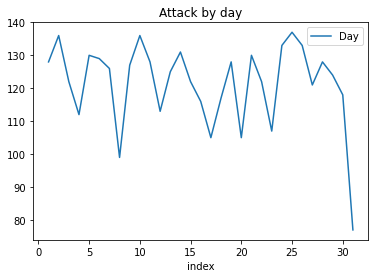

In [34]:
shark_df_day=shark_df.Day.value_counts()
new_day_df=shark_df_day.reset_index()
new_day_df['index']=new_day_df['index'].astype(int)
new_day_df=new_day_df.sort_values(by="index").reset_index(drop=True).set_index("index")
new_day_df.plot(kind="line",title="Attack by day")
plt.show()

# Type

In [35]:
shark_df.Type.value_counts()

Unprovoked      2847
Provoked         347
Invalid          313
Boat              92
Boating           90
Sea Disaster      71
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [36]:
shark_df["Type"] = shark_df["Type"].replace({"Boat": "Boating"})
shark_df["Type"] = shark_df["Type"].replace({"Boatomg": "Boating"})

<ipython-input-36-e329f2da4ac0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_df["Type"] = shark_df["Type"].replace({"Boat": "Boating"})
<ipython-input-36-e329f2da4ac0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_df["Type"] = shark_df["Type"].replace({"Boatomg": "Boating"})


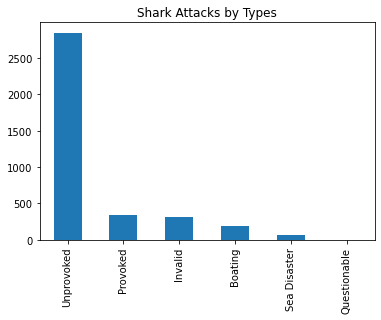

In [37]:
type_value=shark_df.Type.value_counts()
type_value.plot(kind="bar",title="Shark Attacks by Types")
plt.show()

# Need to finish Data Cleanup for Country, Area, Location

In [38]:
# Cleanup and normalize Countries
countries = shark_df["Country"].unique()
for country in countries:
    print(country)

USA
AUSTRALIA
MEXICO
BRAZIL
ENGLAND
SOUTH AFRICA
THAILAND
COSTA RICA
MALDIVES
BAHAMAS
NEW CALEDONIA
ECUADOR
MALAYSIA
LIBYA
nan
CUBA
MAURITIUS
NEW ZEALAND
SPAIN
SAMOA
SOLOMON ISLANDS
JAPAN
EGYPT
ST HELENA, British overseas territory
COMOROS
REUNION
FRENCH POLYNESIA
UNITED KINGDOM
UNITED ARAB EMIRATES
PHILIPPINES
INDONESIA
CHINA
COLUMBIA
CAPE VERDE
Fiji
DOMINICAN REPUBLIC
CAYMAN ISLANDS
ARUBA
MOZAMBIQUE
FIJI
PUERTO RICO
ITALY
ATLANTIC OCEAN
GREECE
ST. MARTIN
FRANCE
PAPUA NEW GUINEA
TRINIDAD & TOBAGO
KIRIBATI
ISRAEL
DIEGO GARCIA
TAIWAN
JAMAICA
PALESTINIAN TERRITORIES
GUAM
SEYCHELLES
BELIZE
NIGERIA
TONGA
SCOTLAND
CANADA
CROATIA
SAUDI ARABIA
CHILE
ANTIGUA
KENYA
RUSSIA
TURKS & CAICOS
UNITED ARAB EMIRATES (UAE)
AZORES
SOUTH KOREA
MALTA
VIETNAM
MADAGASCAR
PANAMA
SOMALIA
NEVIS
BRITISH VIRGIN ISLANDS
NORWAY
SENEGAL
YEMEN
GULF OF ADEN
Sierra Leone
ST. MAARTIN
GRAND CAYMAN
Seychelles
LIBERIA
VANUATU
MEXICO 
HONDURAS
VENEZUELA
SRI LANKA
 TONGA
URUGUAY
INDIA
MICRONESIA
CARIBBEAN SEA
OKINAWA
TANZANIA

In [39]:
# Cleanup and normalize Countries
shark_df["Country"] = shark_df["Country"].replace({np.nan: "UNKOWN", "ST HELENA, British overseas territory": "ST HELENA", "ST. MAARTIN": "ST MARTIN", "ST. MARTIN": "ST MARTIN",
                                                   "Fiji": "FIJI", "Sierra Leone": "SIERRA LEONE", "MID-PACIFC OCEAN": "MID PACIFC OCEAN", "EGYPT ": "EGYPT", 
                                                   " TONGA": "TONGA", "EGYPT / ISRAEL": "EGYPT", "ANDAMAN ISLANDS": "ANDAMAN AND NICOBAR ISLANDS", 
                                                   "RED SEA / INDIAN OCEAN": "YEMEN", "ANDAMAN / NICOBAR ISLANDAS": "ANDAMAN AND NICOBAR ISLANDS", "YEMEN ": "YEMEN", 
                                                   "SUDAN?": "SUDAN", "IRAN / IRAQ": "IRAN", " PHILIPPINES": "PHILIPPINES", "REUNION": "REUNION ISLAND", 
                                                   "SOLOMON ISLANDS / VANUATU": "SOLOMON ISLANDS", "ITALY / CROATIA": "CROATIA", "Seychelles": "SEYCHELLES", 
                                                   "OCEAN": "JAPAN", "INDIAN OCEAN?": "INDIAN OCEAN", "EQUATORIAL GUINEA / CAMEROON": "CAMEROON", 
                                                   "Coast of AFRICA": "ST THOMAS", "Between PORTUGAL & INDIA": "MEDITERRANEAN SEA", "RED SEA?": "RED SEA", 
                                                   "ASIA?": "UNKNOWN", "CEYLON (SRI LANKA)": "SRI LANKA", "UNITED ARAB EMIRATES (UAE)": "UNITED ARAB EMIRATES",
                                                   "MEXICO ": "MEXICO", "NICARAGUA ": "NICARAGUA", "NORTH ATLANTIC OCEAN ": "NORTH ATLANTIC OCEAN", "PACIFIC OCEAN ": "PACIFIC OCEAN"})

<ipython-input-39-cb289a5f1528>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_df["Country"] = shark_df["Country"].replace({np.nan: "UNKOWN", "ST HELENA, British overseas territory": "ST HELENA", "ST. MAARTIN": "ST MARTIN", "ST. MARTIN": "ST MARTIN",


In [40]:
# Cleanup and normalize Area
shark_df["Area"] = shark_df["Area"].replace({np.nan: "UNKNOWN", "165  miles from Bermuda": "Bermuda", " Kikori River mouth": "Ururumba", " La Libertad": "La Libertad", 
" Lau Province": "Lau Province", " Loyalty Islands": "Ouvea", " Manila Bay": "Manila", " New Jersey": "New Jersey", " North Carolina": "North Carolina", 
" Nusa Tenggara": "Nusa Tenggara", " Primorje-Gorski Kotar County": "Opatija", " Split-Dalmatia Count,": "Vis Island", " Split-Dalmatia County": "Omis", 
" Upolu Island": "Nu’ulua", "9.35N 79.35W": "Panama City", "800 miles from land": "Atlantic Ocean", "740 miles SE of Tarawa Atoll": "Tarawa Atoll", 
"600 nm west of the Canary Islands": "Canary Islands", "40 miles off Grand Bahama Island": "Grand Baham Island", "33N, 68W": "Bermuda", "300 miles from Antigua": "Antigua", 
"250 miles southwest of O'ahu, Hawaii": "Hawaii", "25 km off the coast of Iran & 483km from mouth of Persian Gulf": "Iran", "200 nm southeast of Manila": "Manila", "19S, 178?E": "Suva", 
"180 miles southeast of Okinawa": "Okinawa", "12 miles off the north coast": "Porta Plata", "Bimini": "Bimini Islands", "Between DR and Puerto Rico": "Mona Passage", 
"Between Beira & Maputo": "Beira", "Between Honiara & Isabel Island": "Honiara", "Between Somalia & Yemen": "Somalia", "Between Southampton & Canary Islands": "Canary Islands", 
"Between Timor & Darwin, Australia": "Timor", "Boi Island, Victoria": "Victoria", "Cap Vert Peninsula": "Cap-Vert Peninsula", "Chatham Islands, east of New  Zealand": "Chatham Islands", 
"Cikobia Island (north of Vanua Levu)": "Cikobia Island", "Cook islans": "Cook Islands", "Cook Strait": "Cook Islands", "East New Britain Province": "East New Britain", 
"East of the Gulf of Aqaba": "Gulf of Aqaba", "Eastern  Province": "Eastern Cape Province", "Eastern Cape  Province": "Eastern Cape Province", "Eastern Cape Province": "Eastern Cape Province", 
"Eastern Province": "Eastern Cape Province", "Enroute from Suez to Aden (Yemen)": "Suez", "Florida ": "Florida", "Florida Straits": "Florida", "Ganges-Brahmaputra delta": "Ganges-Brahmaputra", 
"Great Exuma": "Great Exuma Island", "Guerrrero": "Guerrero", "Guerro": "Guerrero", "Ha'api ": "Ha'api", "In the English Channel ": "English Channel", "Inhambane Province": "Inhambe Province", 
"KwaZulu-Natal between Port Edward and Port St Johns": "KwaZulu-Natal", "L'Etang-Salé": "L'Etang-Sale", "Ligurian Sea": "Ligurian", "Lomaloma, Lau": "Lau", "Luzon": "Luzon Island", 
"Madang (WO)": "Madang", "Marches region": "Marches Region", "Mexico / Caribbean Sea": "Mexico", "Miyako": "Miyako Island", "Near Bougainville (North Solomons)": "Bougainville", 
"New Ireland Province, Bismarck Archipelago": "New Ireland Province", "New Providence ": "New Providence", "New Providence District": "New Providence", "New Providence Island": "New Providence", 
"North & South Carolina": "North Carolina", "North Carolina ": "North Carolina", "Northwest Italy": "Italy", "Northwest of Viti Levu": "Viti Levu", "Off coast of West Africa": "West Africa", 
"Off Green Island": "Green Island", "Off the Coromandel Peninsula, North Island": "North Island", "Off the western coast of peninsular Malaysia": "Malaysia", "Off Vanua Levu": "Vanua Levu", 
"On the Kowloon penisula, south of Sai Kung": "Sai Kung", "Peter the Great Bay, Khasan, Primorsky Krai (Far East)": "Primorsky Krai", "Red Sea Protectorate": "Red Sea", "Saint-Gilles-les-Bains": "Saint-Gilles", 
"Saint-Paul ": "Saint-Paul", "San Blas coast": "San Blas Islands", "San Blas": "San Blas Islands", "Sea of Japan": "Japan", "Sharjah, ": "Sharjah", "South Carolina ": "South Carolina", 
"South China Sea 200 miles from Hong Kong": "Hong Kong", "South Island, near Karitane north of Dunedin": "South Island", "South Sinai Peninsula": "South Sinai", 
"South Sinai, Gulf of Aqaba": "South Sinai", "St John's": "St. John's", "Telyakovsky Bay, Khasan,  Primorsky Krai (Far East)": "Primorsky Krai", "Territory of Cocos (Keeling) Islands": "Keeling Islands", 
"Tokyo Bay": "Tokyo", "Tokyo Prefecture": "Tokyo", "Unknown, treated at Wick, SCOTLAND": "Wick", "Vava'u": "Vava", "Vavau": "Vavau", "Victoria ": "Victoria", "Wake Island (EnenKio)": "Wake Island", 
"West coast": "Talasea", "Westerm Australia": "Western Australia", "Western Area": "Western Australia", "Western Caroline Islands (North Pacific Ocean)": "Western Caroline Islands",
"10ºS, 142ºE": "Jukuataia Village", "Bougainville (North Solomons)": "Bougainville", "Cargados Carajos Shoals (St. Brandon)": "St. Brandon", "Lau Province": "Lau",
"Lau Group": "Lau", "Ligurian": "Liguria", "Lomaiviti  Island Group": "Lomaiviti Island Group", "South Coast, East New Britain": "South Coast", "St. Johns Reef": "St. Johns",
"Tuamotos": "Tuamotus", "Vava": "Vavau"})

<ipython-input-40-55003fa40c38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_df["Area"] = shark_df["Area"].replace({np.nan: "UNKNOWN", "165  miles from Bermuda": "Bermuda", " Kikori River mouth": "Ururumba", " La Libertad": "La Libertad",


In [41]:
# Cleanup and normalize Locations
locations = shark_df["Location"].unique()
for location in locations:
    print(location)

Oceanside, San Diego County
St. Simon Island, Glynn County
Habush, Oahu
Arrawarra Headland
La Ticla
Flat Rock, Ballina
Piedade Beach, Recife
Lighhouse Point Park, Ponce Inlet, Volusia County
Cocoa Beach, Brevard  County
Daytona Beach, Volusia County
Cairns Aquarium
Isle of Palms,  Charleston County
Hilton Head Island, Beaufort County
Off Land's End
Dugong Bay
Nahoon Beach, East London
Sharpes Beach, Ballina
Sai Noi Beach
Manuelita
Gearys Beach
Lennox Head
Surfers Point, Prevelly
South Point, Gracetown
Madoogali
Robberg Beach, Plettenberg Bay
Shipwrecks Beach, Keoneloa Bay, Kauai
Piedade
Lefthanders, Margaret River Area
Cobblestones, Margaret River Area
Nirvana Beach
Praia de Sauaçuhy, Maceió
Magenta Beach, Noumea
Bimini
St. Francis Bay
Kukio Beach
Waterman's Bay
Lorne
Winkipop
Durban
Little Congwong Beach, La Perouse 
Westernport Bay
Surf Beach, Kiama
Mooloolaba Beach
Espirito Santo
Santa Fe Island
Avalon Point, Manurah
Cone Bay
Nouville
Lizard Island
Martin Islet
Conceicao Beach
Hult

Mont Dore
Koonya Beach, Melbourne
On the south side of Ponce Inlet, Volusia County
Municipal Beach, Riviera Beach, Palm Beach County
Santa Rosa Sound Escambia County
Main Beach, Gold Coast
Poum
McMasters Beach, Central Coast
Parramatta River
Between the Kakanui River and Campbell's Bay
Taronga Wharf, Athol Bay, Sydney Harbor
The Fountain Pub in Tenbury Wells
Oreti Beach (reported as the 4th person bitten in NZ in 2000)
Point Sinclair, Cactus Beach near Penong
Saint Pierre
Phang nga Island
Off Ventura, Anacapa & Santa Cruz Islands
Rio de Janeiro, Guanabara Bay
Boynton Beach, Palm Beach County
Big Island off Kona Village Resort, North Kona
Waddell Reef, Santa Cruz County
Gulfstream Park beach, Palm Beach County
Pet Den, Satellite Beach, Brevard County
Old Kona Airport State Park
South side of Ponce de Leon Inlet, Volusia County
San Benedetto
North of Pidgeon Point, San Mateo County
Cape Canaveral, Brevard County
Fort Pierce Inlet, St. Lucie County
World Typhoon Lagoon, Disney Water Park,

Kalama Beach, Kihei, Maui
Swan River
Ormond By The Sea, Volusia County
Gin Arm Creek
Mission Rocks
Memory Rock, 18 miles from NW end of the Island
Palm Cove Beach
Point Lookout, Stradbroke Island
False Cape
Revolcadero Beach, Acapulco
Palm Island
Chongeone, Xai Xai
Marineland, Sydney
Basse Vallée
Stevens Reef, 70 miles from Mackay
Tabourie Beach
St. Croix, Cane Bay
Wanganui
Point Sur, Monterey County
Inhaca Island
Waimanu, Honoka'a, Hawai'i
Tasman Island
Laguna Beach, Orange County
Pancake Creek
Bird Rock, near Tomales Point, Marin County
Ahé Atoll
Nuulua
Wellington Point
Waihe'e, Wailuku, Maui
Wilson's Promontory, Waratah Bay
Elliot's Cove
Kosi Bay
Smokey Cape
Ft. Pierce, St Lucie County
Sea Ranch, Sonoma County
Ika
Manly Marineland, Sydney
Point Purisima, Santa Barbara County
Beesands
Watamu
Buffels Bay
Copacabana Beach, Acapulco
Dunedin
Inhasoka, Inhambe Bay
Inhambe Bay Estuary, 10 to 12 miles inland from the sea
Pisarach (Pisaras)
Brennecke Beach, Po'ipu, Kaua'i
Truk Lagoon
Outsid

# Time 

In [42]:
shark_df.head()

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Day,Month
0,25-Jun-18,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,25,Jun
1,18-Jun-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,14h00 -15h00,Non-Disclosed,18,Jun
2,9-Jun-18,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,Non-Disclosed,9,Jun
3,8-Jun-18,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,8,Jun
4,4-Jun-18,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",4,Jun


In [43]:
shark_df.Time.unique()

array(['18h00', '14h00  -15h00', '07h45', nan, 'Late afternoon', '17h00',
       '14h00', 'Morning', '15h00', '08h15', '11h00', '10h30', '10h40',
       '16h50', '07h00', '09h30', 'Afternoon', '21h50', '09h40', '08h00',
       '17h35', '15h30', '07h30', '19h00, Dusk', 'Night', '16h00',
       '15h01', '12h00', '13h45', '23h30', '09h00', '14h30', '18h30',
       '12h30', '16h30', '18h45', '06h00', '10h00', '10h44', '13h19',
       'Midday', '13h30', '10h45', '11h20', '11h45', '19h30', '08h30',
       '15h45', 'Shortly before 12h00', '17h34', '17h10', '11h15',
       '08h50', '17h45', '13h00', '10h20', '13h20', '02h00', '09h50',
       '11h30', '17h30', '9h00', '10h43', 'After noon', '15h15', '15h40',
       '19h05', '1300', '14h30 / 15h30', '22h00', '16h20', '14h34',
       '15h25', '14h55', '17h46', 'Morning ', '15h49', '19h00',
       'Midnight', '09h30 / 10h00', '10h15', '18h15', '04h00', '14h50',
       '13h50', '19h20', '10h25', '10h45-11h15', '16h45', '15h52',
       '06h15', '14h

<ipython-input-44-a7cf36bbc747>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_df['Time'] = shark_df['Time'].str.extract("([0-9]+)", expand=False).dropna().astype(int)


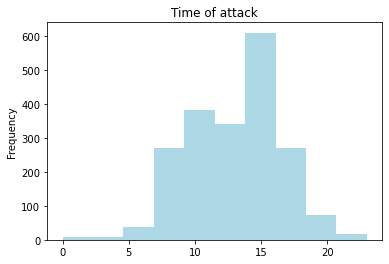

In [44]:
shark_df['Time'] = shark_df['Time'].str.extract("([0-9]+)", expand=False).dropna().astype(int)
shark_df_time = shark_df[shark_df['Time']<25]['Time']
shark_df_time.plot(kind='hist', color='lightblue', title= "Time of attack")
plt.show()

<h3>Get Lat and Long for each Location</h3>

In [46]:
shark_df["Lat"] = ''
shark_df["Lng"] = ''
url = 'https://maps.googleapis.com/maps/api/geocode/json?'
apikey = '&key=' + gkey

<ipython-input-46-c7df69234ca3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_df["Lat"] = ''
<ipython-input-46-c7df69234ca3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_df["Lng"] = ''


In [ ]:
#success = 0
#failure = 0
#for index, row in shark_df.iterrows():
#    try:
#        search_term = f'address={row["Location"]}'
#        response_status = requests.get(url+search_term+apikey)
#        response = response_status.json()
#        shark_df.at[index, 'Lat'] = response['results'][0]['geometry']['location']['lat']
#        shark_df.at[index, 'Lng'] = response['results'][0]['geometry']['location']['lng']
#        success = success + 1
#        print(f'Successful Request. {success} successes so far.')
#    except:
#        failure = failure + 1
#        print(f'Failed Request. {failure} failures so far.')
#print(f'Successes: {success}, Failures: {failure}')

In [ ]:
shark_df.to_csv("data_files/clean_data.csv", index=False, header=True)